# **Hackathon CCR 2021 - Melhorando imagens utilizando IA**
## Equipe 152

Este notebook tem por objetivo servir como uma prova de conceito da ideia de aplicar IA para melhorar imagens da plataforma "Nosso Corre"

In [ ]:
# Download Data:

import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Dont need y_train and y_test

(x_train, _), (x_test, _) = fashion_mnist.load_data()
print('Max value in the x_train is', x_train[0].max())
print('Min value in the x_train is', x_train[0].min())

4423680/4422102 [==============================] - 0s 0us/step
Max value in the x_train is 255
Min value in the x_train is 0


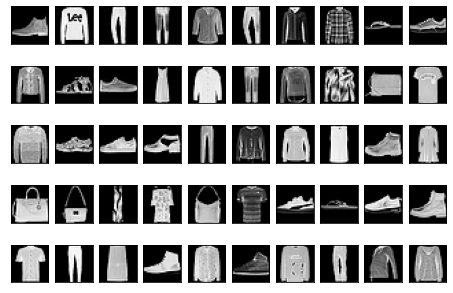

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 10) 
fig.tight_layout(pad=-1)
plt.gray()
a = 0 
for i in range(5): 
  for j in range(10): 
    axs[i, j].imshow(tf.squeeze(x_test[a])) 
    axs[i, j].xaxis.set_visible(False) 
    axs[i, j].yaxis.set_visible(False) 
    a = a + 1 

In [ ]:
# Improve performance:

x_train = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255

In [ ]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [ ]:
# Adding noise:

noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

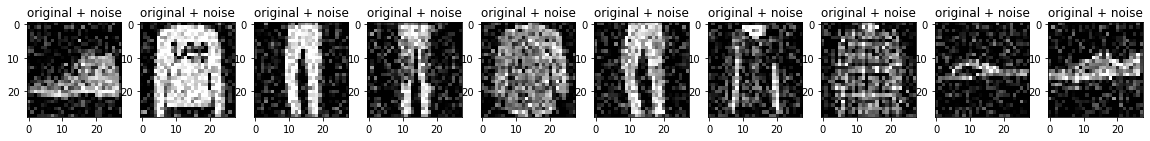

In [ ]:
# Plot

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [ ]:
# Build autoencoder:

class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/100
1875/1875 [==============================] - 13s 3ms/step - loss: 0.0366 - val_loss: 0.0122
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0114 - val_loss: 0.0101
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0092 - val_loss: 0.0088
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0087 - val_loss: 0.0085
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 10/100
1875/1875 [==============================] - 5s 3ms/step - 

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

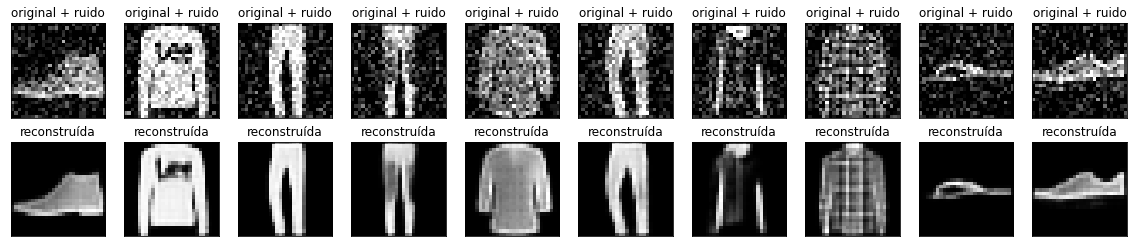

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + ruido")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstruída")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()